<a href="https://colab.research.google.com/github/morokhalid16/KNN-for-option-pricing/blob/master/PredectingAppleStockPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# USe ANN called LSTM Long Short Term Memory to predict closing stock prices of Apple using the past 60 days  stock price


In [0]:
import math
import numpy as np
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [42]:
#get the stock quote
df=web.DataReader('AAPL',data_source='yahoo',start='2010-01-01', end='2020-03-01')
#show data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753
...,...,...,...,...,...,...
2020-02-24,304.179993,289.230011,297.260010,298.179993,55548800.0,298.179993
2020-02-25,302.529999,286.130005,300.950012,288.079987,57668400.0,288.079987
2020-02-26,297.880005,286.500000,286.529999,292.649994,49513700.0,292.649994


In [43]:
df.shape

(2556, 6)

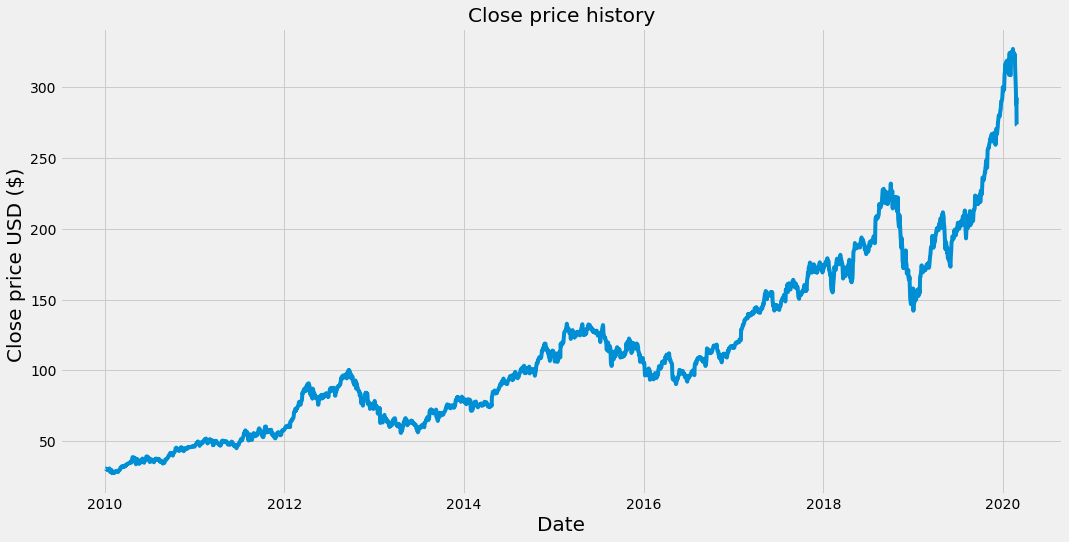

In [44]:
#visualize  close price
plt.figure(figsize=(16,8))
plt.title("Close price history")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close price USD ($) ',fontsize=20)
plt.show()



In [45]:
#create new database with only column close
data=df.filter(['Close'])
# convert to numpy
dataset=data.values
#number of training data
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

2045

In [46]:
#Scale data
scaler =MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data


array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.88474272],
       [0.8209259 ],
       [0.82039213]])

In [47]:
#Creat the training data set
# sclaed training data set
train_data=scaled_data[0:training_data_len,]
#Split data
X_train = []
Y_train = []
for i in range(60,training_data_len):
  X_train.append(scaled_data[i-60:i,0])
  Y_train.append(scaled_data[i,0])
  if i<=61:
    print(X_train)
    print(Y_train)
    print()



[array([1.04653630e-02, 1.06416897e-02, 9.01660433e-03, 8.83074613e-03,
       9.49793954e-03, 8.60676186e-03, 7.46777113e-03, 8.86410644e-03,
       8.28269668e-03, 6.61471952e-03, 1.09562233e-02, 9.37879559e-03,
       7.63456630e-03, 2.71641848e-03, 5.25174452e-03, 6.61948528e-03,
       7.54402326e-03, 3.45032614e-03, 4.76575809e-06, 1.27719135e-03,
       1.81570929e-03, 3.42173159e-03, 0.00000000e+00, 1.62508533e-03,
       9.86486473e-04, 1.97297931e-03, 1.46305592e-03, 3.15485550e-03,
       3.96978105e-03, 5.40900818e-03, 5.00393146e-03, 5.18502391e-03,
       4.58455111e-03, 3.98884408e-03, 2.38758754e-03, 4.10322227e-03,
       4.74182113e-03, 5.99041794e-03, 8.07300968e-03, 8.00628907e-03,
       8.23503910e-03, 8.89270099e-03, 1.28195966e-02, 1.28815451e-02,
       1.47592156e-02, 1.56265581e-02, 1.59410981e-02, 1.64653188e-02,
       1.51499950e-02, 1.54406999e-02, 1.52834362e-02, 1.55360151e-02,
       1.43922586e-02, 1.55836726e-02, 1.73040668e-02, 1.77854020e-02,
     

In [0]:
#convert x_train and y_train to numpy
X_train,Y_train=np.array(X_train),np.array(Y_train)


In [49]:
#Reshape data because LSTM model is expecting 3 dim rather than 2
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1985, 60, 1)

In [0]:
#Build the LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

 

In [0]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [59]:
#train the model
model.fit(X_train,Y_train,batch_size=1,epochs=1)

1985/1985 [==============================] - 46s 23ms/step - loss: 1.9135e-04


In [0]:
#Creat the testing data set
#creat a new array containing scaled values 
test_data=scaled_data[training_data_len-60:,:]
X_test=[]
Y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i,:])



In [0]:
#convert to numpy
X_test=np.array(X_test)


In [0]:
#reshape
X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1) )

In [0]:
#Get the model's predicted price values
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)


In [64]:
#Model evaluation
#Get the root mean squared erro (RMSE)
rms=np.sqrt(np.mean(predictions-Y_test)**2)
rms


4.430438316031678

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


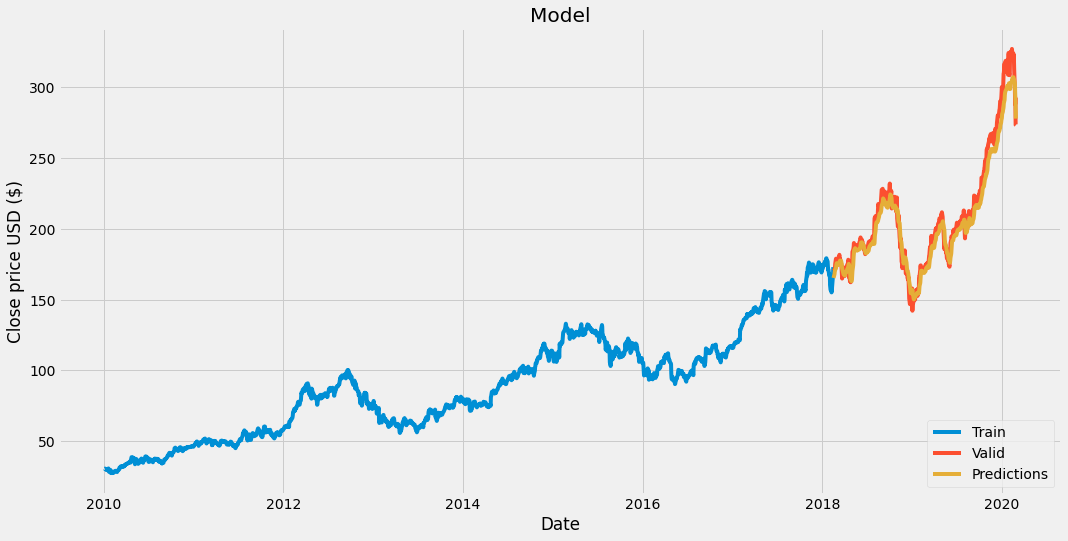

In [66]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
#Visualize 
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Close price USD ($)')
plt.title('Model')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Valid','Predictions'], loc='lower right')
plt.show()


In [67]:
#Show valid and prediction prices
valid

,Close,predictions
Date,,
2018-02-16,172.429993,165.324112
2018-02-20,171.850006,167.971115
2018-02-21,171.070007,169.753586
2018-02-22,172.500000,170.624817
2018-02-23,175.500000,171.214691
...,...,...
2020-02-24,298.179993,303.041351
2020-02-25,288.079987,297.637268
2020-02-26,292.649994,290.368073
